<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 29, 2016: class
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Lecture notes of today (November 29, 2016) class in Python about frequences, $\chi^{2}$ distribution and statistical tests.
</div>

In [33]:
from sympy import *
from sympy import stats

import sys

from random import randint, randrange, normalvariate, shuffle
from collections import Counter, defaultdict

from itertools import permutations
from statistics import mean
from numpy import linspace
from functools import wraps

sys.setrecursionlimit(10000000)
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [10]:
t, m, i, k, n, z = symbols('t m i k n z')
a, b = IndexedBase('a'), IndexedBase('b')

In [11]:
def draw_frequencies_histogram(seq, bins, normed=None, pdf=None):
    
    if callable(pdf):
        normed=True
        domain, theo_fn = pdf(seq)
        plt.plot(domain, [theo_fn(i) for i in domain], 'b')
    
    n, bins, patches = plt.hist(list(seq), bins, normed=normed, facecolor='green', alpha=0.5)
    
    plt.grid(True)
    plt.show()

In [34]:
class stats_test:
    
    def __init__(self, observed):
        self.observed = observed
    
    def __call__(self, f):
        
        @wraps(f)
        def C(samples, *args, repetitions=1, **kwds):
            obs = []
            for r in range(repetitions):
                freqs = Counter(f(*args, **kwds) for _ in range(samples))
                o = self.observed(freqs)
                obs.append(float(o))

            return obs if repetitions-1 else {'freqs': freqs, 'observed': o}

        return C

# $\mathcal{N}$ pdf

- http://docs.sympy.org/dev/modules/stats.html#sympy.stats.Normal

In [13]:
def Normal_distribution(z, mean, std):
    Normal_rv = stats.Normal(symbols('x'), mean, std)
    pdf = stats.density(Normal_rv)
    return Lambda([z], pdf(z))

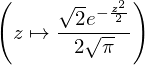

In [14]:
Normal_fn = Normal_distribution(z, 0, 1)
Normal_fn

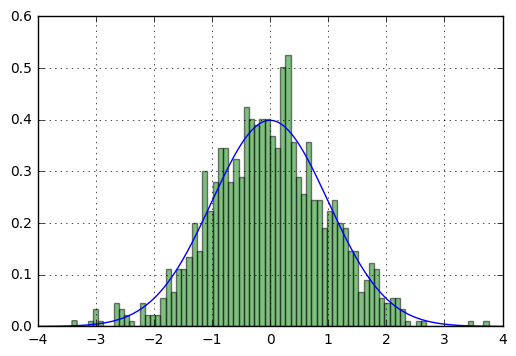

In [15]:
N = 1000
draw_frequencies_histogram([normalvariate(0, 1) for _ in range(N)], 80, 
                           pdf=lambda seq: (linspace(-4, 4, 1e3), Normal_fn))

# $\chi^{2}$ pdf
- https://en.wikipedia.org/wiki/Chi-squared_distribution
- http://docs.sympy.org/dev/modules/stats.html#sympy.stats.ChiSquared

In [35]:
def ChiSquared_distribution(z, freedom_degrees):
    X_Chi_rv = stats.ChiSquared(symbols('x'), freedom_degrees)
    pdf = stats.density(X_Chi_rv)
    return Lambda([z], pdf(z))

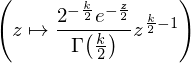

In [36]:
ChiSquared_fn = ChiSquared_distribution(z, freedom_degrees=k)
ChiSquared_fn

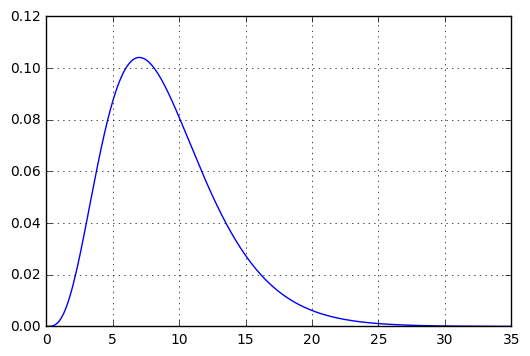

In [37]:
domain = linspace(0, 35, 1e3)
plt.plot(domain, [ChiSquared_fn(i).subs({k:9}) for i in domain], 'b')
plt.grid(True)
None

In [19]:
def Chi_square_observed(freqs):
    f = sum(freqs.values())/Integer(len(freqs))
    return sum((f-v)**2 for v in freqs.values())/f

# Frequencies

In [20]:
[randint(1, 10) for i in range(5)]

Function `test_randint` will use function `random.randint` to sample `N` times a number in $\{1,\ldots,n\}$, producing a `Counter` object:

In [21]:
@stats_test(Chi_square_observed)
def test_randint(n):
    return randint(1, n)

In [22]:
experiment = test_randint(n=10, samples=500)
experiment['freqs']

In [23]:
experiment['observed']

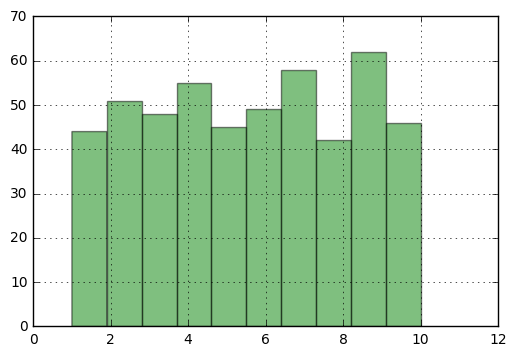

In [24]:
draw_frequencies_histogram(experiment['freqs'].elements(), bins=len(experiment['freqs']))

In [25]:
n = 10
experiment = test_randint(n=n, samples=2000, repetitions=1000)

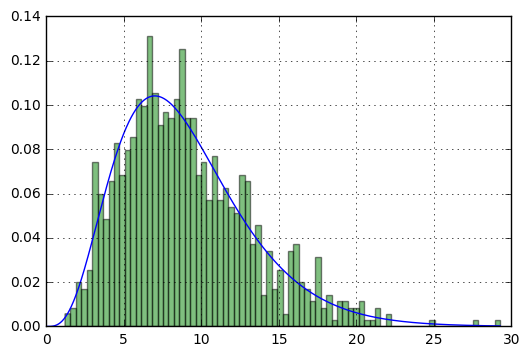

In [26]:
draw_frequencies_histogram(experiment, bins=80, 
                           pdf=lambda seq: (linspace(0, max(seq), 1e3), 
                                            ChiSquared_distribution(z, freedom_degrees=n-1)))

# Permutations

In [27]:
@stats_test(Chi_square_observed)
def rand_perm(seq):
    shuffle(seq)
    return tuple(seq)

In [28]:
a = IndexedBase('a')
experiment = rand_perm(seq=[a[i] for i in range(5)], samples=10**4)

In [29]:
experiment['freqs']

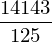

In [30]:
experiment['observed']

In [31]:
#draw_frequencies_histogram(experiment['freqs'].elements(), bins=len(experiment['freqs']))

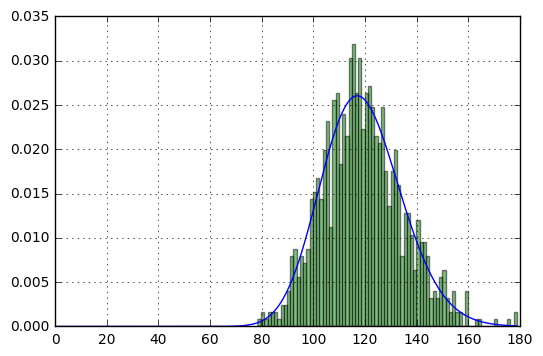

In [32]:
n = 5
experiment = rand_perm(seq=[a[i] for i in range(n)], samples=10**4, repetitions=10**3)
draw_frequencies_histogram(experiment, bins=80, 
                           pdf=lambda seq: (linspace(0, max(seq), 1e3), 
                                            ChiSquared_distribution(z, freedom_degrees=factorial(n)-1)))

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.